**Preprocessing**

In [ ]:
# import libraries
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Data_for_UCI_named (1).csv', low_memory=False)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
df.value_counts().sum()

10000

In [ ]:
# Check missing values
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [ ]:
# As instructed, drop stab column 
df.drop('stab', axis = 1, inplace = True)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [ ]:
# Seperate features
X = df.drop(columns='stabf')
Y = df['stabf']

In [ ]:
# split  data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [ ]:
y_train.value_counts()

unstable    5092
stable      2908
Name: stabf, dtype: int64

In [ ]:
# Scaling the dataset using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_train_scaled

array([[ 0.36732671, -0.98604156,  0.65044706, ...,  0.33985949,
         0.58556788,  0.49223946],
       [-0.06465869,  0.08943734,  1.03507899, ..., -1.5584875 ,
         1.42964862, -1.44352101],
       [-1.46785   ,  1.29841758, -0.50253617, ...,  1.45153362,
        -1.04574277,  0.49248925],
       ...,
       [ 0.65760851, -0.72275633, -1.4058879 , ...,  0.29310048,
        -1.55058661,  0.81034412],
       [-0.05931596, -1.26053241, -1.01047147, ..., -0.38825455,
        -0.72678059,  1.66791568],
       [-1.47321368,  0.63843757,  0.25012249, ..., -1.17410957,
         1.179282  ,  0.78362657]])

**Model building and evaluation**

In [ ]:
# Define the training model with function
def train_model(model, x_train = x_train_scaled, y_train = y_train, X_test = x_test_scaled):
    model.fit(X_train, y_train)
    y_pred = model.predict(x_test)
    return classification_report(y_pred, y_test)

In [ ]:
# define the models
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1)

from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, random_state=1)

from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=1)

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
extc = ExtraTreesClassifier(random_state=1)

In [ ]:
# Classify using Random forest
rfc.fit(x_train_scaled, y_train)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true=y_test, y_pred=rfc.predict(x_test_scaled))
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.929


In [ ]:
# Classify using ExtratreeClassifier
extc.fit(x_train_scaled, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred=extc.predict(x_test_scaled))
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.928


In [ ]:
# Classify with xgboost
xgb.fit(x_train_scaled, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred=xgb.predict(x_test_scaled))
print('Accuracy: {}'.format(round(accuracy, 4)))

Accuracy: 0.9195


In [ ]:
# Classify using LGBMClassifier
lgbm.fit(x_train_scaled, y_train)
accuracy = accuracy_score(y_true=y_test, y_pred=lgbm.predict(x_test_scaled))
print('Accuracy: {}'.format(round(accuracy, 3)))

Accuracy: 0.938


In [ ]:
# Define pareameters for RandomizedSearchCV
n_estimators = [50, 100, 300, 500, 1000]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(extc, hyperparameter_grid, random_state=1)
search = clf.fit(x_train_scaled, y_train)

In [ ]:
# define cross_val_score
from sklearn.model_selection import cross_val_score
def cross_val(model,x_train = x_train_scaled, x_test = x_test_scaled, y_train=y_train ):
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='f1_macro')
    return scores.mean()*100

In [19]:
print("CV score of RandomClassifier: ", round(cross_val(rfc),3))
print("CV score of ExtraTreesClassifier: ", round(cross_val(extc),3))
print("CV score of XGBClassifier: ", round(cross_val(xgb),3))
print("CV score of LGBMClassifier: ", round(cross_val(lgbm),3))
print("CV score of RandomizedSearchCV: ", round(cross_val(clf),3))

CV score of RandomClassifier:  91.123
CV score of ExtraTreesClassifier:  91.469
CV score of XGBClassifier:  91.316
CV score of LGBMClassifier:  93.306
CV score of RandomizedSearchCV:  91.645


In [25]:
# Check feature importance
print(extc.feature_importances_)

# Computing the importance of each feature 
feature_importance = extc.feature_importances_ 

# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in extc.estimators_], axis = 0) 

[0.11739736 0.11844468 0.11316851 0.11546569 0.03950675 0.04037132
 0.04070628 0.04057864 0.08978291 0.09367636 0.09688268 0.09401882]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Comparison of different Feature Importances')

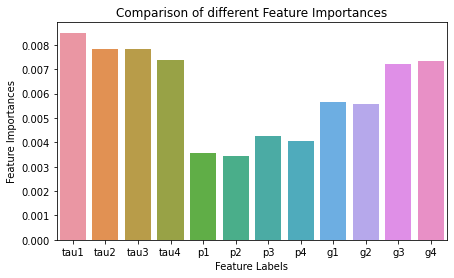

In [31]:
#plot graph of feature importance for better visualization
import seaborn as sns
plt.figure(figsize=(7, 4))
sns.barplot(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances')